In [ ]:
Name: Piyush Sharma

Enrollnment number: 22323032
    
BS-MS (MnC) S4

In [29]:
#Logistic regression for binary classification using iris dataset

import numpy as np
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

iris = load_iris()
X = iris['data'] 
y = iris['target'] 


g = np.array([])
for q in y:
    if q == 0:
        g = np.append(g, 1)
    elif q == 1:
        g = np.append(g, 0)
    else:
        g = np.append(g, 0)
y = g


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy: ")
print(accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 
1.0
Confusion Matrix:
[[26  0]
 [ 0 19]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Accuracy: 
0.9
Confusion Matrix:
[[ 9  3]
 [ 0 18]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.75      0.86        12
        True       0.86      1.00      0.92        18

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.91      0.90      0.90        30



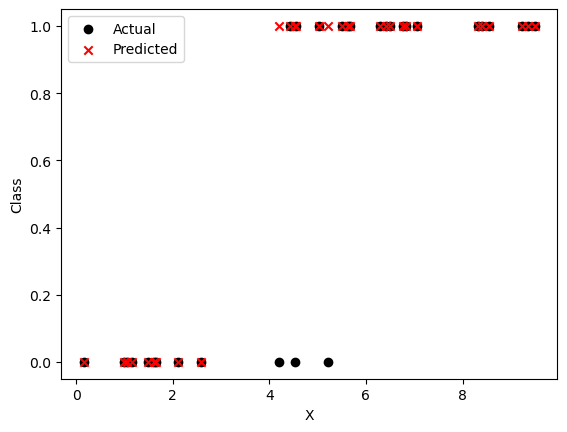

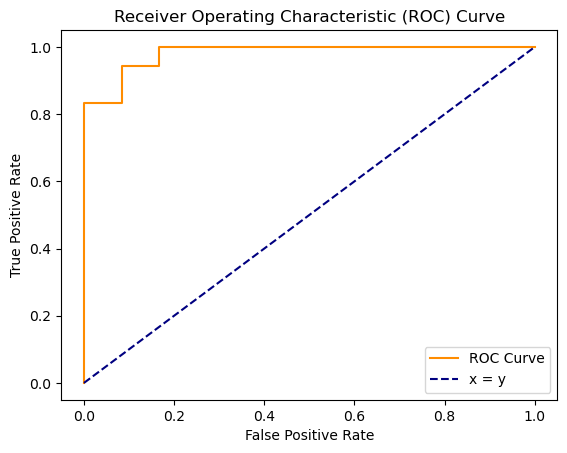

Area under curve is:
0.9814814814814815


In [26]:
# Logistic regression for binary classification using randomly generated values, and with roc curve

from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


X = np.random.rand(100, 1) * 10
y = (X.ravel() + np.random.randn(100) * 2) > 4


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ")
print(accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('X')
plt.ylabel('Class')
plt.legend()
plt.show()

y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label = 'ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='x = y')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
print("Area under curve is:")
print(roc_auc)

In [27]:
# Applying Linear Discriminant Analysis

import numpy as np
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

iris = load_iris()
X = iris['data'] 
y = iris['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ldafit = LinearDiscriminantAnalysis().fit(X_train, y_train)
ldapred = ldafit.predict(X_test)

print(confusion_matrix(y_test, ldapred))
print(classification_report(y_test, ldapred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



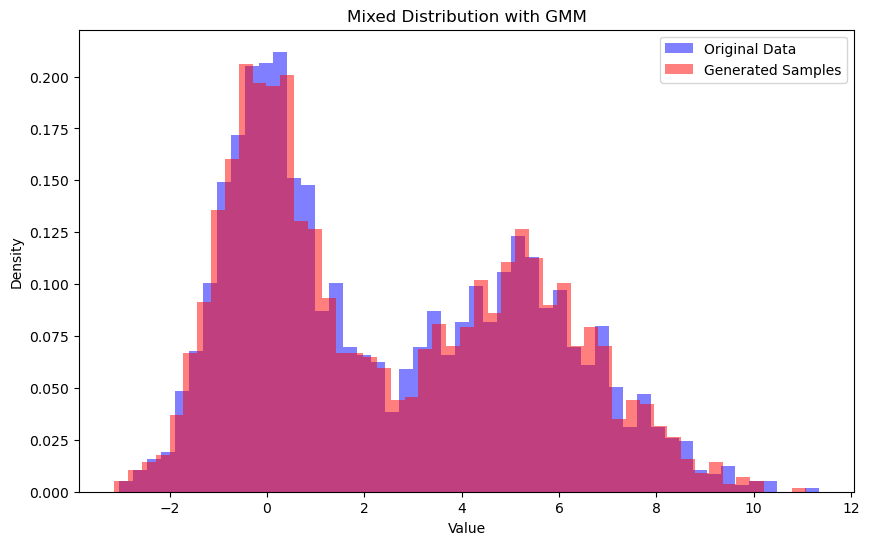

In [24]:
# Mixture Model Distribution with GMM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
# Generate mixed distribution data
np.random.seed(0)
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=5, scale=2, size=1000)
mixed_data = np.concatenate((data1, data2))
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(mixed_data.reshape(-1, 1))
# Generate samples from the learned model
samples, _ = gmm.sample(2000)
# Plot original data and samples
plt.figure(figsize=(10, 6))
plt.hist(mixed_data, bins=50, alpha=0.5, density=True, color='blue', label='Original Data')
plt.hist(samples, bins=50, alpha=0.5, density=True, color='red', label='Generated Samples')
plt.title('Mixed Distribution with GMM')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

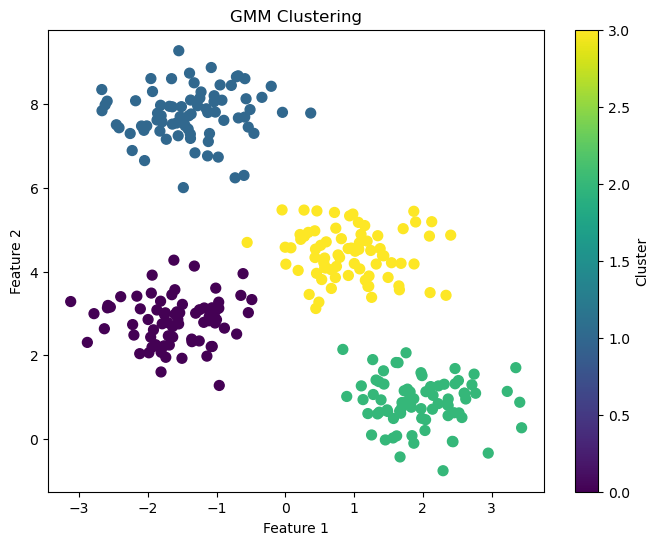

In [25]:
# Gaussian Mixture Model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
# Predict the cluster labels
labels = gmm.predict(X)
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [28]:
# Applying Quadratic Discriminant Analysis

import numpy as np
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


iris = load_iris()
X = iris['data'] 
y = iris['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


qdafit = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
qdapred = qdafit.predict(X_test)

print(confusion_matrix(y_test, qdapred))
print(classification_report(y_test, qdapred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [3]:
# RANDOM FOREST IN PYTHON

# Importing necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Load dataset (example using iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Make predictions
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [12]:
# SVM FOR CLASSIFICATION

# Importing necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Load dataset (example using iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
# Train the classifier
svm_classifier.fit(X_train, y_train)
# Make predictions
y_pred = svm_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [1]:
# K-Nearest Neighbour with Python

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# We will load the dataset from the given file path and read it into the dataframe
file_path = 'C:/Users/CL2/Desktop/Prcatical_Exam_MA-204/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(file_path, names=names)

# We will now Convert class labels to numeric values
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['class'] = df['class'].map(class_mapping)
# We will Split data into features and target
X = df.drop('class', axis=1)
y = df['class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN classifiers with k=3 and k=5
# We will first train the model with K=3 then with the train dataset and then predict the class with the test dataset then we will
# calculate the accuracies and then generate the classification report.
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred_3 = knn3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)
report_3 = classification_report(y_test, y_pred_3)
print(f"Accuracy for k=3: {accuracy_3}")
print("Classification Report for k=3:")
print(report_3)

# We will first train the model with K=5 then with the train dataset and then predict the class with the test dataset then we will
# calculate the accuracies and then generate the classification report.

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
accuracy_5 = accuracy_score(y_test, y_pred_5)
report_5 = classification_report(y_test, y_pred_5)
print(f"Accuracy for k=5: {accuracy_5}")
print("Classification Report for k=5:")
print(report_5)


In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize SVR model
svm_regressor = SVR(kernel='linear')
# Train the model
svm_regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.010306188479354503


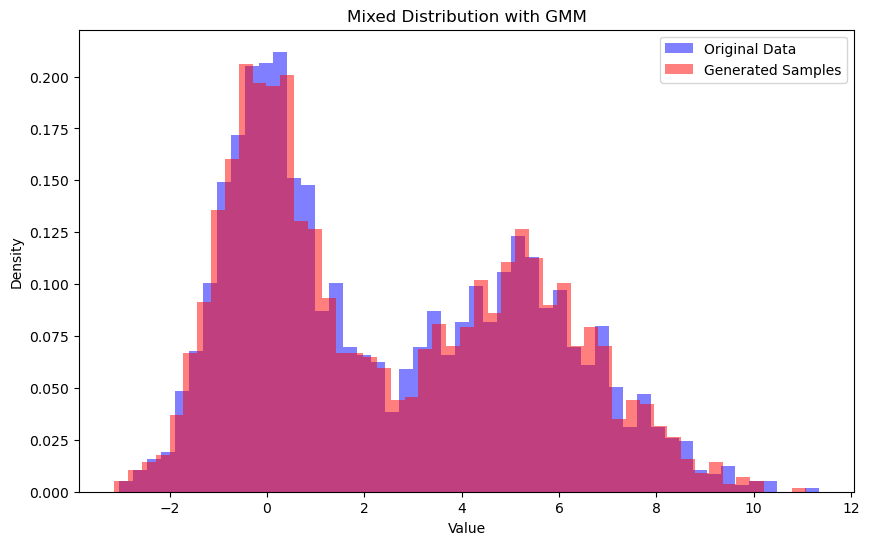

In [4]:
'''You can adjust the number of components in the GMM (n_components) and other
hyperparameters based on your specific dataset and requirements. Additionally, you
can use more complex distributions or mixtures of distributions if needed.
'''

'''
• We generate mixed distribution data by sampling from two normal
distributions with different means and variances.
• We fit a Gaussian Mixture Model (GMM) with 2 components to the mixed data
using sklearn.mixture.GaussianMixture.
• We generate samples from the learned GMM using the sample method.
• Finally, we visualize the original data and the generated samples using
histograms.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
# Generate mixed distribution data
np.random.seed(0)
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=5, scale=2, size=1000)
mixed_data = np.concatenate((data1, data2))
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(mixed_data.reshape(-1, 1))
# Generate samples from the learned model
samples, _ = gmm.sample(2000)
# Plot original data and samples
plt.figure(figsize=(10, 6))
plt.hist(mixed_data, bins=50, alpha=0.5, density=True, color='blue', label='Original Data')
plt.hist(samples, bins=50, alpha=0.5, density=True, color='red', label='Generated Samples')
plt.title('Mixed Distribution with GMM')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [34]:
# Basic ANN for classification in python using Tensorflow 

# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Load dataset (example using iris dataset)
iris = load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Initialize the ANN model
model = Sequential()
# Add the input layer and the first hidden layer
model.add(Dense(units=8, activation='relu', input_shape=(X_train.shape[1],)))
# Add the second hidden layer
model.add(Dense(units=4, activation='relu'))
# Add the output layer
model.add(Dense(units=3, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
# Make predictions
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/home/piyush/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Accuracy: 1.0


In [35]:
# ANN for regression using tensorflow/Keras

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the ANN model
model = Sequential()
# Add the input layer and the first hidden layer
model.add(Dense(units=8, activation='relu', input_shape=(X_train.shape[1],)))
# Add more hidden layers if needed
model.add(Dense(units=4, activation='relu'))
# Add the output layer
model.add(Dense(units=1, activation='linear'))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

/home/piyush/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Squared Error: 238.1506526902908


In [16]:
# Deep learning code using TensorFlow/Keras to build a neural
# network for image classification using the CIFAR-10 dataset:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2,
random_state=42)
# Define the model architecture
model = Sequential([
 Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 MaxPooling2D((2, 2)),
 Conv2D(128, (3, 3), activation='relu', padding='same'),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dropout(0.5),
 Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val,
y_val))
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

/home/piyush/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


2024-05-07 13:03:39.196397: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.2789 - loss: 1.9369 - val_accuracy: 0.4839 - val_loss: 1.4228
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4852 - loss: 1.4184 - val_accuracy: 0.5841 - val_loss: 1.1667
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5767 - loss: 1.1949 - val_accuracy: 0.6316 - val_loss: 1.0333
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.6156 - loss: 1.0890 - val_accuracy: 0.6669 - val_loss: 0.9319
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6463 - loss: 1.0001 - val_accuracy: 0.6981 - val_loss: 0.8699
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6796 - loss: 0.9108 - val_accuracy: 0.7034 - val_loss: 0.8440
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.7085 - loss: 0.8381 - val_accuracy: 0.7140 - val_loss: 0.8148
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2165s 3s/step - accuracy: 0.7258 - loss: 0.7825 - val_accurac